### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import os
os.chdir(r'C:\Users\trish\Important Docs\Credit Risk Modeling')

#### Import dataset

In [2]:
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
Y_train = pd.read_csv('y_train.csv',  header = None)
Y_test = pd.read_csv('y_test.csv',  header = None)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### Explore data

In [3]:
X_train.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,annual_inc_factor_60K_80K,annual_inc_factor_80K_100K,annual_inc_factor_100K_120K,annual_inc_factor_120K_140K,annual_inc_factor_>140K,mths_since_last_delinq_missing,mths_since_last_delinq_0_3,mths_since_last_delinq_4_30,mths_since_last_delinq_31_56,mths_since_last_delinq_>57
0,9674904,11527040,18000.0,18000.0,18000.0,36 months,10.99,589.22,B,B2,...,1,0,0,0,0,1,0,0,0,0
1,1273509,1516907,17975.0,17975.0,17975.0,36 months,18.55,654.81,D,D4,...,0,0,0,0,0,1,0,0,0,0
2,51926692,55356419,6000.0,6000.0,6000.0,36 months,12.69,201.27,C,C2,...,0,0,0,0,0,0,0,1,0,0
3,46825275,49973088,6500.0,6500.0,6500.0,36 months,9.99,209.71,B,B3,...,0,1,0,0,0,0,0,1,0,0
4,3146847,3859163,11325.0,11325.0,11325.0,36 months,14.09,387.56,B,B5,...,0,0,0,0,0,0,0,0,0,1


In [4]:
Y_train.head()

,0
0,1
1,0
2,1
3,1
4,1


In [5]:
X_train.shape

(709903, 263)

In [6]:
Y_train.shape

(709903, 1)

In [7]:
X_test.shape

(177476, 263)

In [8]:
Y_test.shape

(177476, 1)

In [9]:
list_cat_var = ['grade_A',
'grade_B',
'grade_C',
'grade_D',
'grade_E',
'grade_F',
'grade_G',
'home_ownership_MORTGAGE',
'home_ownership_OWN',
'home_ownership_RENT_OTHER_NONE_ANY',
'addr_state_IA_NV_HI_FL_AL_SD',
'addr_state_NM_NY',
'addr_state_UT_CA',
'addr_state_DC_VT_MS_NE_ND_ME',
'addr_state_VA_NJ_LA_MO_NC_MD',
'addr_state_OK_AZ_DE_RI_PA_MA',
'addr_state_OTHERS',
'verification_status_Not Verified',
'verification_status_Source Verified',
'verification_status_Verified',
'purpose_educational_small_business',
'purpose_wedding_renewable_energy',
'purpose_house_moving',
'purpose_medical_vacation_debt_consolidation_major_purchase',
'purpose_car_home_improvement',
'initial_list_status_f',
'initial_list_status_w',
'term_36',
'term_60',
'emp_length_0',
'emp_length_1_2_3_4',
'emp_length_5',
'emp_length_6',
'emp_length_7',
'emp_length_8',
'emp_length_9',
'emp_length_10',
'mnths_since_issue_d_factor_<54',
'mnths_since_issue_d_factor_54_56',
'mnths_since_issue_d_factor_56_58',
'mnths_since_issue_d_factor_58_60',
'mnths_since_issue_d_factor_60_62',
'mnths_since_issue_d_factor_62_72',
'mnths_since_issue_d_factor_72_82',
'mnths_since_issue_d_factor_>82',
'int_rate_factor_<10',
'int_rate_factor_10_15',
'int_rate_factor_15_20',
'int_rate_factor_>20',
'mnths_since_earliest_cr_line_factor_<160',
'mnths_since_earliest_cr_line_factor_160_343',
'mnths_since_earliest_cr_line_factor_343_571',
'mnths_since_earliest_cr_line_factor_>571',
'annual_inc_factor_<40K',
'annual_inc_factor_40K_60K',
'annual_inc_factor_60K_80K',
'annual_inc_factor_80K_100K',
'annual_inc_factor_100K_120K',
'annual_inc_factor_120K_140K',
'annual_inc_factor_>140K',
'mths_since_last_delinq_missing',
'mths_since_last_delinq_0_3',
'mths_since_last_delinq_4_30',
'mths_since_last_delinq_31_56',
'mths_since_last_delinq_>57']

In [10]:
train_ref_cat = X_train.loc[:, list_cat_var]

In [11]:
list_ref_var = ['grade_G',
'home_ownership_RENT_OTHER_NONE_ANY',
'addr_state_IA_NV_HI_FL_AL_SD',
'verification_status_Verified',
'purpose_educational_small_business',
'initial_list_status_f',
'term_60',
'emp_length_0',
'mnths_since_issue_d_factor_>82',
'int_rate_factor_>20',
'mnths_since_earliest_cr_line_factor_>571',
'annual_inc_factor_<40K',
'mths_since_last_delinq_0_3']

In [12]:
final_train = train_ref_cat.drop(list_ref_var, axis = 1)
final_train.head()

,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,home_ownership_MORTGAGE,home_ownership_OWN,addr_state_NM_NY,addr_state_UT_CA,...,annual_inc_factor_40K_60K,annual_inc_factor_60K_80K,annual_inc_factor_80K_100K,annual_inc_factor_100K_120K,annual_inc_factor_120K_140K,annual_inc_factor_>140K,mths_since_last_delinq_missing,mths_since_last_delinq_4_30,mths_since_last_delinq_31_56,mths_since_last_delinq_>57
0,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,0,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
4,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### PD Model Estimation

#### Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [89]:
reg = LogisticRegression()

In [15]:
pd.options.display.max_rows = None

In [16]:
reg.fit(final_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
reg.intercept_

array([-0.47281194])

In [18]:
reg.coef_

array([[ 2.43680336e+00,  1.71669334e+00,  1.25154714e+00,
         8.64666511e-01,  5.52221254e-01,  2.48195961e-01,
         1.11021551e-01,  8.17979855e-02,  9.10947879e-02,
         9.77609312e-02,  3.56859566e-01,  7.27837807e-02,
         1.11725838e-01,  2.21224478e-01,  1.11131709e-01,
         2.00070999e-02,  2.19599621e-01, -8.42028711e-02,
        -5.68342210e-02, -1.92475580e-02,  6.82640034e-02,
        -4.67253695e-03,  1.00110184e-01,  8.69206310e-02,
         3.69185436e-02,  6.72390642e-02,  7.42189433e-02,
         5.15615297e-02,  1.41017781e-01,  5.19683578e+00,
         3.84847446e+00,  2.66184138e+00,  2.03968523e+00,
         1.63761281e+00,  9.43397526e-01,  4.12288105e-01,
         2.13872111e-01,  0.00000000e+00,  2.17850994e-01,
         2.08748012e-01,  2.23616510e-01,  2.77423084e-01,
         1.31385216e-01,  2.71380352e-01,  3.93760080e-01,
         4.68568154e-01,  5.71851342e-01,  5.28196888e-01,
         1.04073368e-01,  1.38092027e-01,  1.94060375e-0

In [19]:
features = final_train.columns.values
summary_table = pd.DataFrame(columns = ['Features'], data = features)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Features,Coefficients
0,Intercept,-0.472812
1,grade_A,2.436803
2,grade_B,1.716693
3,grade_C,1.251547
4,grade_D,0.864667
5,grade_E,0.552221
6,grade_F,0.248196
7,home_ownership_MORTGAGE,0.111022
8,home_ownership_OWN,0.081798
9,addr_state_NM_NY,0.091095


In order to see if the features are significant or not, we need to look at their p-vlaues. As Logistic Regression class doesn't have p-values inbuilt, we use statsmodel to perform stepwise logistic regression as shown below.

In [29]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = stepwise_selection(final_train, Y_train)

print('resulting features:')
print(result)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.


Add  initial_list_status_w          with p-value 0.0
Add  grade_F                        with p-value 0.0
Add  mnths_since_issue_d_factor_56_58 with p-value 0.0
Add  mnths_since_issue_d_factor_54_56 with p-value 0.0
Add  grade_D                        with p-value 0.0
Add  mnths_since_issue_d_factor_72_82 with p-value 0.0
Add  grade_A                        with p-value 0.0
Add  grade_B                        with p-value 0.0
Add  grade_C                        with p-value 0.0
Add  mnths_since_issue_d_factor_58_60 with p-value 0.0
Add  mnths_since_issue_d_factor_60_62 with p-value 0.0
Add  mnths_since_issue_d_factor_<54 with p-value 0.0
Add  mnths_since_issue_d_factor_62_72 with p-value 0.0
Add  home_ownership_MORTGAGE        with p-value 4.71026e-108


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.


Drop initial_list_status_w          with p-value 0.125837
Add  grade_E                        with p-value 3.21014e-90
Add  addr_state_OTHERS              with p-value 9.07e-34
Add  annual_inc_factor_80K_100K     with p-value 3.05583e-28
Add  annual_inc_factor_100K_120K    with p-value 1.02338e-29
Add  annual_inc_factor_>140K        with p-value 3.92677e-30
Add  annual_inc_factor_60K_80K      with p-value 6.99313e-34
Add  annual_inc_factor_120K_140K    with p-value 2.07148e-46
Add  annual_inc_factor_40K_60K      with p-value 7.41481e-27
Add  emp_length_10                  with p-value 8.32804e-11
Add  emp_length_1_2_3_4             with p-value 2.20326e-07
Add  home_ownership_OWN             with p-value 1.06785e-07
Add  addr_state_DC_VT_MS_NE_ND_ME   with p-value 6.37104e-07
Add  verification_status_Not Verified with p-value 1.01773e-06
Add  purpose_wedding_renewable_energy with p-value 5.38843e-06
Add  mths_since_last_delinq_31_56   with p-value 3.34541e-05
Add  int_rate_factor_<10  

In [34]:
final_train_2 = final_train.loc[:, result]

reg_2 = LogisticRegression()
reg_2.fit(final_train_2, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
features = final_train_2.columns.values
summary_table = pd.DataFrame(columns = ['Features'], data = features)
summary_table['Coefficients'] = np.transpose(reg_2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg_2.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Features,Coefficients
0,Intercept,-0.137083
1,grade_F,0.246880
2,mnths_since_issue_d_factor_56_58,2.694923
3,mnths_since_issue_d_factor_54_56,3.885342
4,grade_D,0.865476
5,mnths_since_issue_d_factor_72_82,0.426780
6,grade_A,2.442765
7,grade_B,1.720229
8,grade_C,1.254454
9,mnths_since_issue_d_factor_58_60,2.072672


### PD Model Validation (test)

#### Out-of-sample validation (test)

In [38]:
final_test = X_test.loc[:, result]

In [39]:
final_test.head()

,grade_F,mnths_since_issue_d_factor_56_58,mnths_since_issue_d_factor_54_56,grade_D,mnths_since_issue_d_factor_72_82,grade_A,grade_B,grade_C,mnths_since_issue_d_factor_58_60,mnths_since_issue_d_factor_60_62,...,verification_status_Not Verified,purpose_wedding_renewable_energy,mths_since_last_delinq_31_56,int_rate_factor_<10,mnths_since_earliest_cr_line_factor_343_571,addr_state_OK_AZ_DE_RI_PA_MA,addr_state_UT_CA,mths_since_last_delinq_>57,addr_state_NM_NY,addr_state_VA_NJ_LA_MO_NC_MD
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
y_hat_pred = reg_2.predict(final_test)
y_hat_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

To achieve the raw probabilities for each observation, we will use the predicted probabilitites and decide a cut-off value instead of the default value of 0.5

In [45]:
y_hat_pred_prob = reg_2.predict_proba(final_test)
y_hat_pred_prob

array([[0.14993205, 0.85006795],
       [0.0019073 , 0.9980927 ],
       [0.00595899, 0.99404101],
       ...,
       [0.08069436, 0.91930564],
       [0.22028945, 0.77971055],
       [0.03258995, 0.96741005]])

Since we want to look at good loans, we will consider the second value for each of the arrays and set that in a separate array.

In [47]:
y_hat_pred_prob = y_hat_pred_prob[:][:, 1]
y_hat_pred_prob

array([0.85006795, 0.9980927 , 0.99404101, ..., 0.91930564, 0.77971055,
       0.96741005])

In [51]:
df_temp = Y_test
df_temp.reset_index(drop = True, inplace = True)
df_actual_pred_prob = pd.concat([df_temp, pd.DataFrame(y_hat_pred_prob)], axis = 1)
df_actual_pred_prob.shape

(177476, 2)

In [52]:
df_actual_pred_prob.columns = ['Actual_Val', 'Predicted_Prob']
df_actual_pred_prob.index = Y_test.index
df_actual_pred_prob.head()

,Actual_Val,Predicted_Prob
0,1,0.850068
1,1,0.998093
2,1,0.994041
3,1,0.790355
4,1,0.999031


### Accuracy and AUC

In [57]:
#tr = 0.5
tr = 0.9
df_actual_pred_prob['Predicted_Val'] = np.where((df_actual_pred_prob['Predicted_Prob'] > tr), 1, 0)

In [58]:
pd.crosstab(df_actual_pred_prob['Actual_Val'], df_actual_pred_prob['Predicted_Val'], rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,7095,4524
1,36988,128869


In [55]:
pd.crosstab(df_actual_pred_prob['Actual_Val'], df_actual_pred_prob['Predicted_Val'], 
            rownames = ['Actual'], colnames = ['Predicted'])/df_actual_pred_prob.shape[0]

Predicted,0,1
Actual,,
0,0.000006,0.065462
1,0.000011,0.934521


In [59]:
(pd.crosstab(df_actual_pred_prob['Actual_Val'], df_actual_pred_prob['Predicted_Val'], 
            rownames = ['Actual'], colnames = ['Predicted'])/df_actual_pred_prob.shape[0]).iloc[0,0] + (pd.crosstab(df_actual_pred_prob['Actual_Val'], df_actual_pred_prob['Predicted_Val'], 
            rownames = ['Actual'], colnames = ['Predicted'])/df_actual_pred_prob.shape[0]).iloc[1,1]

0.7660979512722847

Thus, our model has an accuracy of 93.45%. 

Under the threshold of 0.5, the model genearted a lot of false positives. This is critical as lot of bad applicants may be granted loan. Therefore, we want to capture more such people by resetting the threshold.

Therefore we set a new threshold of 0.9 and rerun the code and log the difference in the performance.

By running the model at a threshold of 0.9, the accuracy seems to have dropped but we are able to capture the poor performers better as can be seen in the confusion matrix above.

By using this new threshold of 0.9, we are reducing the no. of bad loans but we are also reducing the total no. of approved loans. Doing this may affect the business, thus we do not want to set a very conservative threshold.

To be able to decide on an optimal cut-off, we will use the ROC curve.

In [60]:
from sklearn.metrics import roc_curve, roc_auc_score
roc_curve(df_actual_pred_prob['Actual_Val'], df_actual_pred_prob['Predicted_Prob'])

(array([0.        , 0.        , 0.        , ..., 0.99982787, 1.        ,
        1.        ]),
 array([0.00000000e+00, 6.02929029e-06, 1.80878709e-05, ...,
        9.99987941e-01, 9.99987941e-01, 1.00000000e+00]),
 array([1.99986273, 0.99986273, 0.99985863, ..., 0.50651663, 0.49833188,
        0.48872882]))

In [61]:
fpr, tpr, threshold = roc_curve(df_actual_pred_prob['Actual_Val'], df_actual_pred_prob['Predicted_Prob'])

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'ROC')

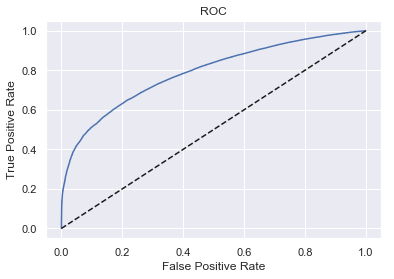

In [64]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')

In [65]:
AUC = roc_auc_score(df_actual_pred_prob['Actual_Val'], df_actual_pred_prob['Predicted_Prob'])
AUC

0.7877831621431322

#### Gini and KS Statistic

In [66]:
df_actual_pred_prob = df_actual_pred_prob.sort_values('Predicted_Prob')
df_actual_pred_prob.head()

,Actual_Val,Predicted_Prob,Predicted_Val
49333,1,0.488729,0
158659,1,0.490105,0
136690,0,0.498332,0
161689,0,0.503376,0
165211,1,0.506517,0


In [67]:
df_actual_pred_prob = df_actual_pred_prob.reset_index()

In [68]:
df_actual_pred_prob.head()

,index,Actual_Val,Predicted_Prob,Predicted_Val
0,49333,1,0.488729,0
1,158659,1,0.490105,0
2,136690,0,0.498332,0
3,161689,0,0.503376,0
4,165211,1,0.506517,0


In [69]:
df_actual_pred_prob['Cum N Population'] = df_actual_pred_prob.index + 1
df_actual_pred_prob['Cum N Good'] = df_actual_pred_prob['Actual_Val'].cumsum()
df_actual_pred_prob['Cum N Bad'] = df_actual_pred_prob['Cum N Population'] - df_actual_pred_prob['Actual_Val'].cumsum()

df_actual_pred_prob.head()

,index,Actual_Val,Predicted_Prob,Predicted_Val,Cum N Population,Cum N Good,Cum N Bad
0,49333,1,0.488729,0,1,1,0
1,158659,1,0.490105,0,2,2,0
2,136690,0,0.498332,0,3,2,1
3,161689,0,0.503376,0,4,2,2
4,165211,1,0.506517,0,5,3,2


In [70]:
df_actual_pred_prob['Cum % Population'] = df_actual_pred_prob['Cum N Population']/(df_actual_pred_prob.shape[0])
df_actual_pred_prob['Cum % Good'] = df_actual_pred_prob['Cum N Good']/(df_actual_pred_prob['Actual_Val'].sum())
df_actual_pred_prob['Cum % Bad'] = df_actual_pred_prob['Cum N Bad']/(df_actual_pred_prob.shape[0] - df_actual_pred_prob['Actual_Val'].sum())

Text(0.5, 1.0, 'Gini Coefficient')

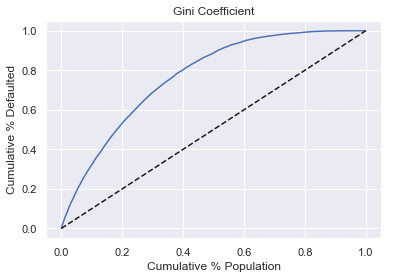

In [71]:
plt.plot(df_actual_pred_prob['Cum % Population'], df_actual_pred_prob['Cum % Bad'])
plt.plot(df_actual_pred_prob['Cum % Population'], df_actual_pred_prob['Cum % Population'], linestyle = '--', color = 'k')
plt.xlabel('Cumulative % Population')
plt.ylabel('Cumulative % Defaulted')
plt.title('Gini Coefficient')

In [73]:
gini = AUC*2 -1
gini

0.5755663242862643

Text(0.5, 1.0, 'Kolmogorov-Smirnov')

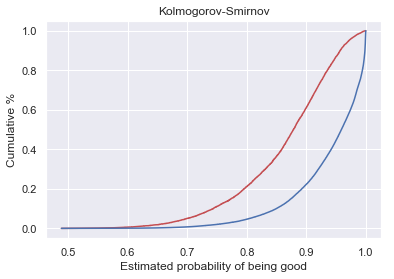

In [74]:
plt.plot(df_actual_pred_prob['Predicted_Prob'], df_actual_pred_prob['Cum % Bad'], color = 'r')
plt.plot(df_actual_pred_prob['Predicted_Prob'], df_actual_pred_prob['Cum % Good'], color = 'b')
plt.xlabel('Estimated probability of being good')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov')

In [75]:
ks = max(df_actual_pred_prob['Cum % Bad'] - df_actual_pred_prob['Cum % Good'])
ks

0.4324284746846786

### Setting the cutoff

Text(0.5, 1.0, 'ROC')

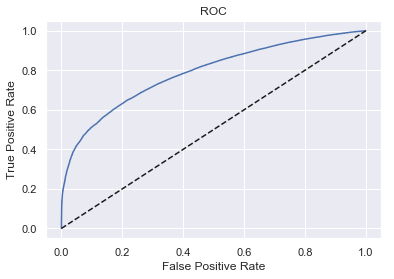

In [79]:
from sklearn.metrics import roc_curve, roc_auc_score
roc_curve(df_actual_pred_prob['Actual_Val'], df_actual_pred_prob['Predicted_Prob'])

fpr, tpr, threshold = roc_curve(df_actual_pred_prob['Actual_Val'], df_actual_pred_prob['Predicted_Prob'])

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')

In [80]:
threshold

array([1.99986273, 0.99986273, 0.99985863, ..., 0.50651663, 0.49833188,
       0.48872882])

In [82]:
df_cutoff = pd.concat([pd.DataFrame(threshold), pd.DataFrame(fpr), pd.DataFrame(tpr)], axis = 1)
df_cutoff.columns = ['Thresholds', 'False_Positive_Rate', 'True_Positive_Rate']
df_cutoff.head()

,Thresholds,False_Positive_Rate,True_Positive_Rate
0,1.999863,0.0,0.000000
1,0.999863,0.0,0.000006
2,0.999859,0.0,0.000018
3,0.999841,0.0,0.000054
4,0.999838,0.0,0.000072


In [83]:
df_cutoff['Thresholds'][0] = 1 - 1/np.power(10,16)
df_cutoff.head()

,Thresholds,False_Positive_Rate,True_Positive_Rate
0,1.000000,0.0,0.000000
1,0.999863,0.0,0.000006
2,0.999859,0.0,0.000018
3,0.999841,0.0,0.000054
4,0.999838,0.0,0.000072


In [84]:
def n_approved(p):
    return np.where(df_actual_pred_prob['Predicted_Prob'] >= p, 1, 0).sum()

In [85]:
df_cutoff['Approved'] = df_cutoff['Thresholds'].apply(n_approved)
df_cutoff['Rejected'] = df_actual_pred_prob['Predicted_Prob'].shape[0] - df_cutoff['Approved']
df_cutoff['Approval Rate'] = df_cutoff['Approved']/ df_actual_pred_prob['Predicted_Prob'].shape[0]
df_cutoff['Rejection Rate'] = 1 - df_cutoff['Approval Rate']

In [88]:
df_cutoff.tail()

,Thresholds,False_Positive_Rate,True_Positive_Rate,Approved,Rejected,Approval Rate,Rejection Rate
40372,0.515516,0.999570,0.999982,177468,8,0.999955,0.000045
40373,0.508328,0.999742,0.999982,177470,6,0.999966,0.000034
40374,0.506517,0.999828,0.999988,177472,4,0.999977,0.000023
40375,0.498332,1.000000,0.999988,177474,2,0.999989,0.000011
40376,0.488729,1.000000,1.000000,177476,0,1.000000,0.000000


This table consisting approval and rejection rate at each threshold can be used to determine the cutoff values for the probability of default.